# Usando funciones:

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def interpolate_lag(x,data,n):
    sum = 0
    for i in range(0,n+1):
        sum += L(i,n,x,data)*data[i,1]
    return sum

def L(i,n,x,data):
    prod = 1
    for j in range(n+1):
        if j!=i:
            prod *= (x-data[j,0])/(data[i,0]-data[j,0])
    return prod

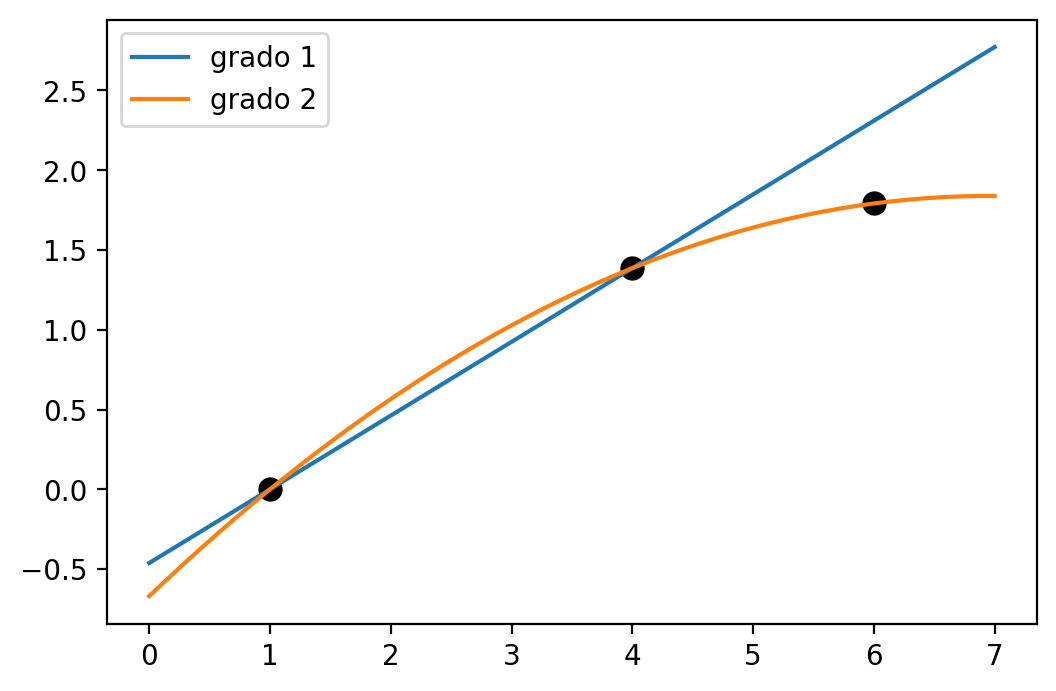

In [ ]:
x_axis = np.linspace(0,7,50)

plt.figure(dpi=200)
plt.scatter(A[:,0],A[:,1],color='black',s=60)
plt.plot(x_axis,[interpolate_lag(x,A,1) for x in x_axis],label='grado 1')
plt.plot(x_axis,[interpolate_lag(x,A,2) for x in x_axis],label='grado 2')
plt.legend(loc='best')
plt.show()

# Ejercicio

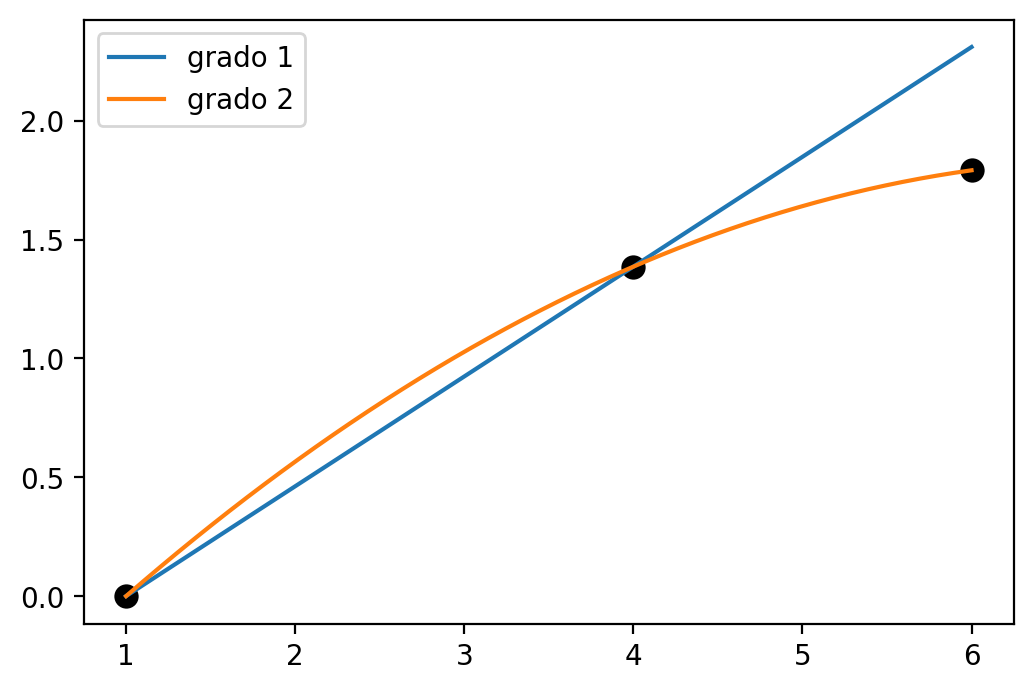

In [3]:
A = np.array([[1,0],[4,1.386294],[6,1.791760]])

x_axis = np.linspace(np.min(A,axis=0)[0],np.max(A,axis=0)[0],50)

plt.figure(dpi=200)
plt.scatter(A[:,0],A[:,1],color='black',s=60)
for k in range(1,A.shape[0]):
    plt.plot(x_axis,[interpolate_lag(x,A,k) for x in x_axis],label=f'grado {k}')
plt.legend(loc='best')
plt.show()

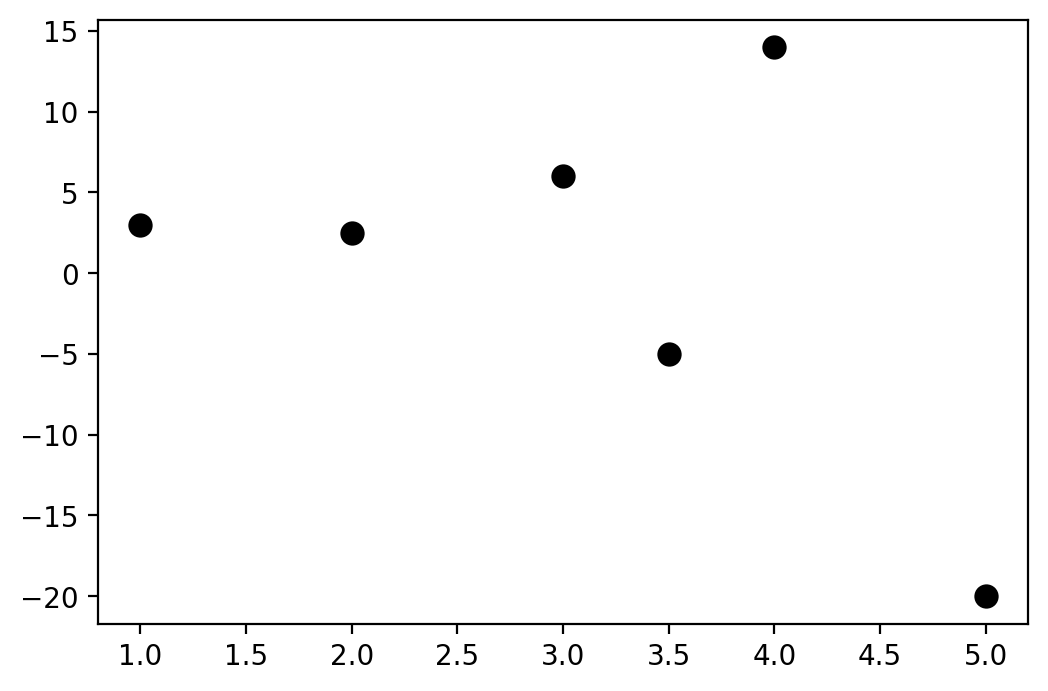

In [7]:
A = np.array([[1,3],[2,2.5],[3,6],[3.5,-5],[4,14],[5,-20]])

plt.figure(dpi=200)
plt.scatter(A[:,0],A[:,1],color='black',s=60)
plt.show()

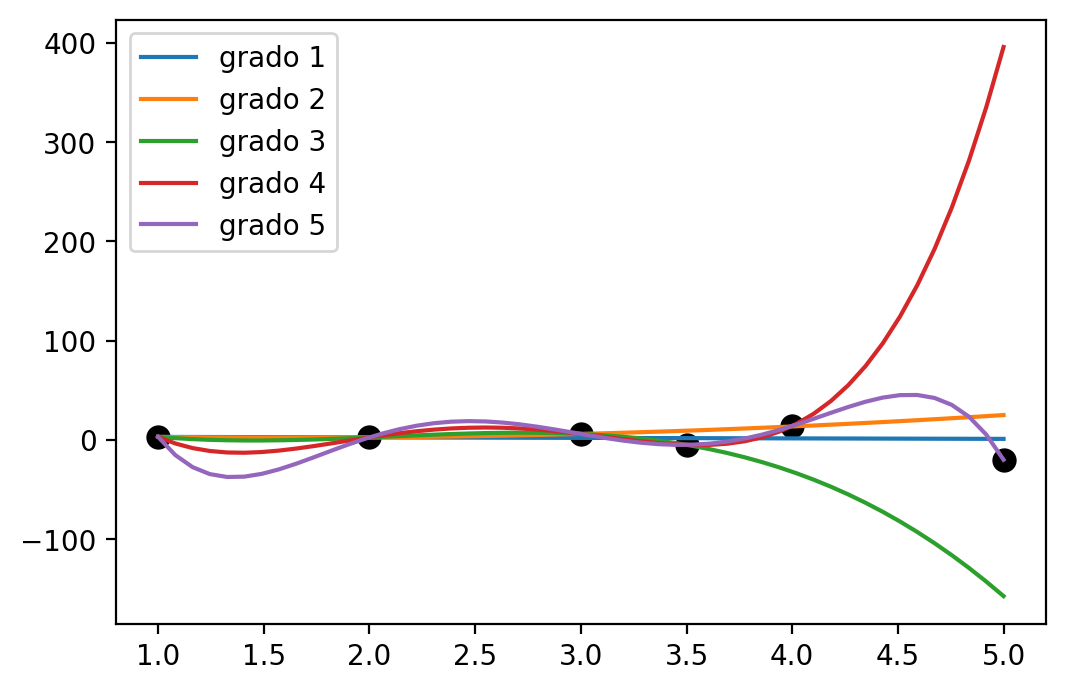

In [8]:
x_axis = np.linspace(np.min(A,axis=0)[0],np.max(A,axis=0)[0],50)

plt.figure(dpi=200)
plt.scatter(A[:,0],A[:,1],color='black',s=60)
for k in range(1,A.shape[0]):
    plt.plot(x_axis,[interpolate_lag(x,A,k) for x in x_axis],label=f'grado {k}')
plt.legend(loc='best')
plt.show()

# Usando la clase

Polinomio evaluado en x=5: 3.466666666666667


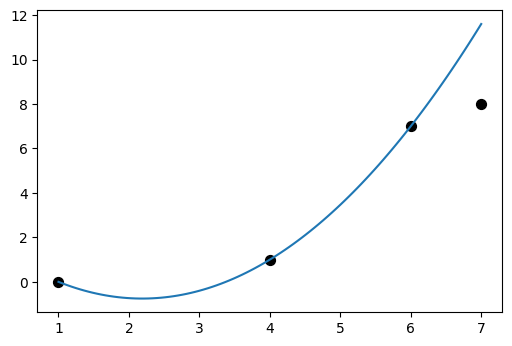

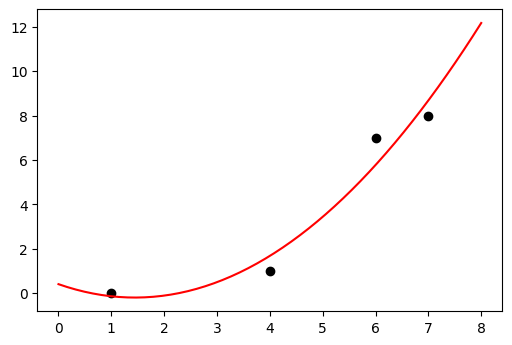

Error respecto al promedio: 50.0
Error cuadrático: 2.4545454545454537
S_r < S_t : True
Desviación estandar de los datos y_i: 4.08248290463863
Error estandar de la estimación (s_yx): 1.5666989036012802
S_yx < S_y : True
Coeficiente de determinación r2: 0.9509090909090909


In [7]:
from interpolacion_aproximacion import RegresionLineal, InterpolacionLagrange
import numpy as np

A = np.array([[1,0],[4,1],[6,7],[7,8]])

interpolacion = InterpolacionLagrange()
interpolacion.fit(data=A,grado=2)
print(f"Polinomio evaluado en x=5: {interpolacion.eval(5)}")
interpolacion.plot()

rl = RegresionLineal(grado=2)
rl.fit(datos=A)
rl.plot()
rl.metrics()

Datos:
[[1 0]
 [4 1]
 [6 7]
 [7 8]]
Coeficientes:
[[-1.73780743e-15  3.33333333e-01 -3.33333333e-01]
 [ 1.33333333e+00 -1.03333333e+01  2.10000000e+01]
 [-4.66666667e+00  6.16666667e+01 -1.95000000e+02]]


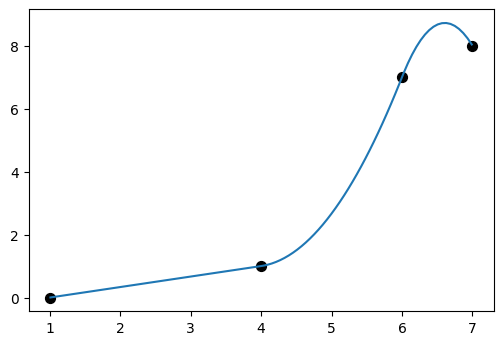

In [2]:
from interpolacion_aproximacion import Splines
import numpy as np

X = np.array([[1,0],[4,1],[6,7],[7,8]])

print(f"Datos:\n{X}")

spl = Splines()
coefs = spl.fit(X)
print(f"Coeficientes:\n{coefs}")
spl.plot()

# Ejemplo 01: Lagrange vs Splines cuadráticos

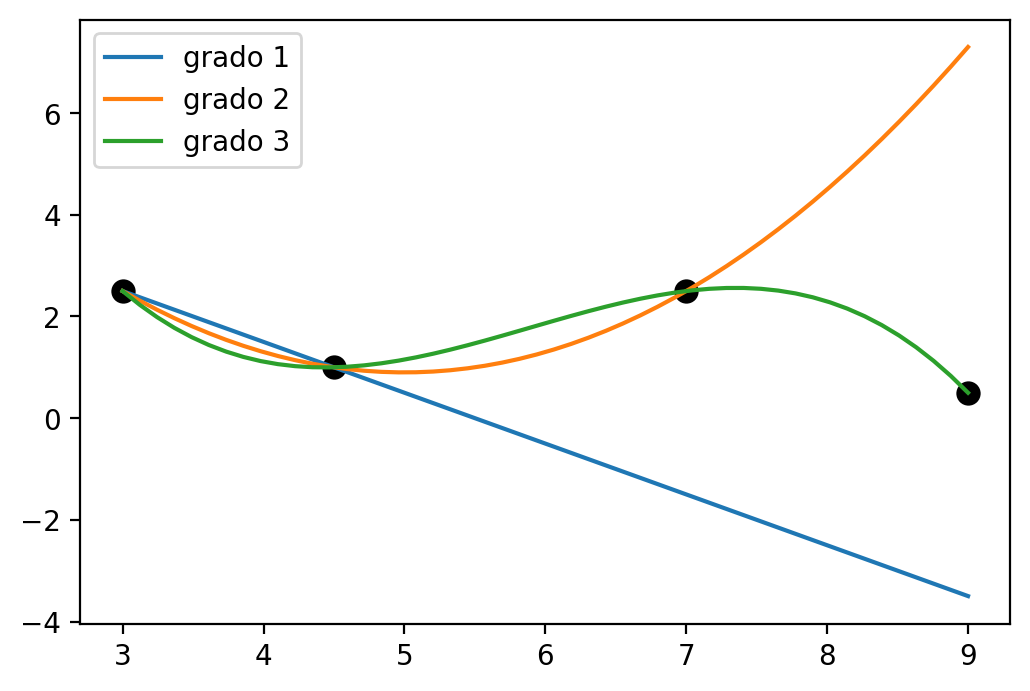

In [9]:
from interpolacion_aproximacion import InterpolacionLagrange

x_axis = np.linspace(np.min(X,axis=0)[0],np.max(X,axis=0)[0],50)

plt.figure(dpi=200)
plt.scatter(X[:,0],X[:,1],color='black',s=60)
for k in range(1,X.shape[0]):
    int_lag = InterpolacionLagrange()
    int_lag.fit(data=X,grado=k)
    plt.plot(x_axis,[int_lag.eval(x) for x in x_axis],label=f'grado {k}')
plt.legend(loc='best')
plt.show()

Datos:
[[3.  2.5]
 [4.5 1. ]
 [7.  2.5]
 [9.  0.5]]
Coeficientes:
[[-1.   5.5]
 [ 0.6 -1.7]
 [-1.   9.5]]


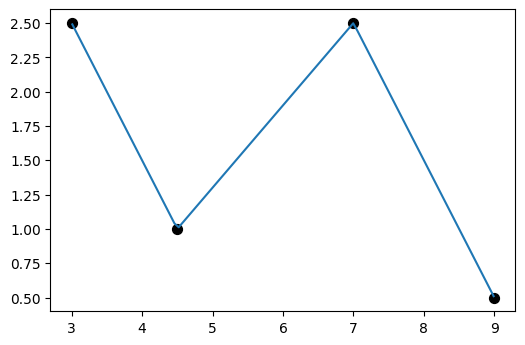

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from interpolacion_aproximacion import Splines

X = np.array([[3,2.5],[4.5,1],[7,2.5],[9,0.5]])
print(f"Datos:\n{X}")

spl = Splines()
coefs = spl.fit(X,grado=1)
print(f"Coeficientes:\n{coefs}")
spl.plot()

Datos:
[[3.  2.5]
 [4.5 1. ]
 [7.  2.5]
 [9.  0.5]]
Coeficientes:
[[-2.33660827e-15 -1.00000000e+00  5.50000000e+00]
 [ 6.40000000e-01 -6.76000000e+00  1.84600000e+01]
 [-1.60000000e+00  2.46000000e+01 -9.13000000e+01]]


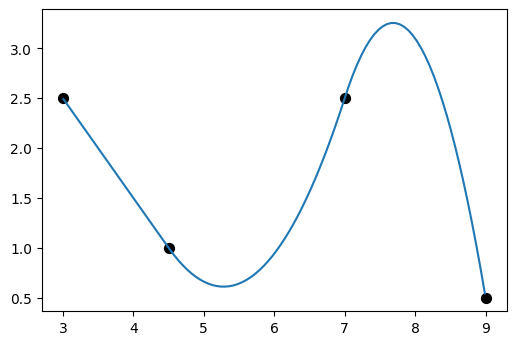

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from interpolacion_aproximacion import Splines

X = np.array([[3,2.5],[4.5,1],[7,2.5],[9,0.5]])
print(f"Datos:\n{X}")

spl = Splines()
coefs = spl.fit(X)
print(f"Coeficientes:\n{coefs}")
spl.plot()

In [2]:
print(f"Matriz del sistema:\n{spl.A}")
print(f"Vector b:\n{spl.b}")

Matriz del sistema:
[[  9.     3.     1.     0.     0.     0.     0.     0.     0.  ]
 [ 20.25   4.5    1.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.     0.    20.25   4.5    1.     0.     0.     0.  ]
 [  0.     0.     0.    49.     7.     1.     0.     0.     0.  ]
 [  0.     0.     0.     0.     0.     0.    49.     7.     1.  ]
 [  0.     0.     0.     0.     0.     0.    81.     9.     1.  ]
 [  9.     1.     0.    -9.    -1.     0.     0.     0.     0.  ]
 [  0.     0.     0.    14.     1.     0.   -14.    -1.     0.  ]
 [  1.     0.     0.     0.     0.     0.     0.     0.     0.  ]]
Vector b:
[2.5 1.  1.  2.5 2.5 0.5 0.  0.  0. ]


# Ejemplo 02

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from interpolacion_aproximacion import Splines

X = np.array([[1,3],[2,2.5],[3,6],[3.5,-5],[4,14],[5,-40]])
print(f"Datos:\n{X}")

spl = Splines()
coefs = spl.fit(X)
print(f"Coeficientes:\n{coefs}")
spl.plot()